In [517]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors


from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium 


print('Ready')

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.

Ready


In [583]:
from bs4 import BeautifulSoup
Postalcode = requests.get('https://www.worldpostalcodes.org/en/france/department/list-of-postal-codes-in-paris').text
soup=BeautifulSoup(Postalcode,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of Postal Codes in Paris Region France</title>


Postal Code Place Name Region Department Arrondissement Canton 75001 1er Arrondissement Paris Île-de-France Paris Paris Paris 75002 2ème Arrondissement Paris Île-de-France Paris Paris Paris 75003 3ème Arrondissement Paris Île-de-France Paris Paris Paris 75004 4ème Arrondissement Paris Île-de-France Paris Paris Paris 75005 5ème Arrondissement Paris Île-de-France Paris Paris Paris 75006 6ème Arrondissement Paris Île-de-France Paris Paris Paris 75007 7ème Arrondissement Paris Île-de-France Paris Paris Paris 75008 8ème Arrondissement Paris Île-de-France Paris Paris Paris 75009 9ème Arrondissement Paris Île-de-France Paris Paris Paris 75011 11ème Arrondissement Paris Île-de-France Paris Paris Paris 75012 12ème Arrondissement Paris Île-de-France Paris Paris Paris 75013 13ème Arrondissement Paris Île-de-France Paris Paris Paris 75014 14ème Arrondissement Paris Île-de-France Paris Paris Paris 75015 15ème Arrondissement Paris Île-de-France Paris Paris Paris 75016 16ème Arrondissement Paris Île-de-France Paris Paris Paris 75017 17ème Arrondissement Paris Île-de-France Paris Paris Paris 75018 18ème Arrondissement Paris Île-de-France Paris Paris Paris 75019 19ème Arrondissement Paris Île-de-France Paris Paris Paris 75116 16ème Arrondissement Paris Île-de-France Paris Paris Paris

In [584]:
html = pd.read_html(tab)
df=html[0]
df.head(30)

,Postal Code,Place Name,Region,Department,Arrondissement,Canton
0,75001.0,1er Arrondissement Paris,Île-de-France,Paris,Paris,Paris
1,75002.0,2ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
2,75003.0,3ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
3,75004.0,4ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
4,75005.0,5ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
5,75006.0,6ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
6,75007.0,7ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
7,75008.0,8ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
8,75009.0,9ème Arrondissement Paris,Île-de-France,Paris,Paris,Paris
9,NaN,NaN,NaN,NaN,NaN,NaN


In [585]:
df=df.dropna(axis=0)
df=df.drop(['Arrondissement', 'Canton'], axis=1)
df=df.drop([10,11,12,13,14,15,16,17,18,20])
df

,Postal Code,Place Name,Region,Department
0,75001.0,1er Arrondissement Paris,Île-de-France,Paris
1,75002.0,2ème Arrondissement Paris,Île-de-France,Paris
2,75003.0,3ème Arrondissement Paris,Île-de-France,Paris
3,75004.0,4ème Arrondissement Paris,Île-de-France,Paris
4,75005.0,5ème Arrondissement Paris,Île-de-France,Paris
5,75006.0,6ème Arrondissement Paris,Île-de-France,Paris
6,75007.0,7ème Arrondissement Paris,Île-de-France,Paris
7,75008.0,8ème Arrondissement Paris,Île-de-France,Paris
8,75009.0,9ème Arrondissement Paris,Île-de-France,Paris


In [586]:
df['Postal Code'] = df['Postal Code'].astype(str).replace('\.0', '', regex=True)
df['Address']=df['Postal Code']+', '+df['Region']
df

,Postal Code,Place Name,Region,Department,Address
0,75001,1er Arrondissement Paris,Île-de-France,Paris,"75001, Île-de-France"
1,75002,2ème Arrondissement Paris,Île-de-France,Paris,"75002, Île-de-France"
2,75003,3ème Arrondissement Paris,Île-de-France,Paris,"75003, Île-de-France"
3,75004,4ème Arrondissement Paris,Île-de-France,Paris,"75004, Île-de-France"
4,75005,5ème Arrondissement Paris,Île-de-France,Paris,"75005, Île-de-France"
5,75006,6ème Arrondissement Paris,Île-de-France,Paris,"75006, Île-de-France"
6,75007,7ème Arrondissement Paris,Île-de-France,Paris,"75007, Île-de-France"
7,75008,8ème Arrondissement Paris,Île-de-France,Paris,"75008, Île-de-France"
8,75009,9ème Arrondissement Paris,Île-de-France,Paris,"75009, Île-de-France"


In [587]:
column_names = ['Address', 'Name', 'Latitude', 'Longitude'] 

neighbors = pd.DataFrame(columns=column_names)

neighbors

,Address,Name,Latitude,Longitude


In [588]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="ANDapplication")
address = df['Address']
name = df['Place Name']

location = None
latitude = None
longitude = None

for data in range(0, len(address)):
    dt = address[data]
    nm = name[data]
    location = geolocator.geocode('{}'.format(dt))
    latitude = location.latitude
    longitude = location.longitude

    neighbors = neighbors.append({ 'Address':dt,'Name':nm,'Latitude': location.latitude,'Longitude': location.longitude}, ignore_index=True)


In [589]:
neighbors


,Address,Name,Latitude,Longitude
0,"75001, Île-de-France",1er Arrondissement Paris,48.863266,2.348263
1,"75002, Île-de-France",2ème Arrondissement Paris,48.867481,2.344056
2,"75003, Île-de-France",3ème Arrondissement Paris,48.863044,2.360137
3,"75004, Île-de-France",4ème Arrondissement Paris,48.860845,2.352929
4,"75005, Île-de-France",5ème Arrondissement Paris,48.846403,2.348368
5,"75006, Île-de-France",6ème Arrondissement Paris,48.849392,2.332260
6,"75007, Île-de-France",7ème Arrondissement Paris,48.854757,2.324789
7,"75008, Île-de-France",8ème Arrondissement Paris,48.868853,2.320879
8,"75009, Île-de-France",9ème Arrondissement Paris,48.877070,2.337921


In [590]:
geolocator = Nominatim(user_agent="ANDIapplication")
location = geolocator.geocode('Paris')
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Paris are 48.8566969, 2.3514616.


In [591]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)
for lat, lng, nam in zip(neighbors['Latitude'], neighbors['Longitude'], neighbors['Name']):
    label = '{}'.format(nam)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='white',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [592]:
CLIENT_ID = '2DQV3UIGDRKMPFA3R1O54ZFUHH4JO05JXBW5OTTWV2JPZ5YI'
CLIENT_SECRET = '2LN30F13R3KS54FGXWMMIUN1XGG244R1WT14TNN4DAXSDMJH'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2DQV3UIGDRKMPFA3R1O54ZFUHH4JO05JXBW5OTTWV2JPZ5YI
CLIENT_SECRET:2LN30F13R3KS54FGXWMMIUN1XGG244R1WT14TNN4DAXSDMJH


In [593]:
neighbors.loc[0, 'Name']

'1er Arrondissement Paris'

In [594]:
neighborhood_latitude = neighbors.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighbors.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_address = neighbors.loc[0, 'Address'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_address, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of 75001, Île-de-France are 48.8632664, 2.3482634174698793.


In [595]:
search_query = 'venues'
radius = 1500
LIMIT = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=2DQV3UIGDRKMPFA3R1O54ZFUHH4JO05JXBW5OTTWV2JPZ5YI&client_secret=2LN30F13R3KS54FGXWMMIUN1XGG244R1WT14TNN4DAXSDMJH&v=20180605&ll=48.8632664,2.3482634174698793&radius=1500&limit=500'

In [596]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f0411c61582505d8fede9c5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Les Halles',
  'headerFullLocation': 'Les Halles, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 245,
  'suggestedBounds': {'ne': {'lat': 48.876766413500015,
    'lng': 2.3687462611490626},
   'sw': {'lat': 48.84976638649999, 'lng': 2.327780573790696}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c457e8d8c1f20a195ce3d99',
       'name': 'Passage du Grand Cerf',
       'location': {'address': 'Passage du Grand Cerf',
        'lat': 48.86476,
        'lng': 2.349486,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.86476,
 

In [597]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [598]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Passage du Grand Cerf,4c457e8d8c1f20a195ce3d99,Pedestrian Plaza,48.864760,2.349486
1,LEGO® Store,57035c8b498ebcbc85d70c40,Toy / Game Store,48.861818,2.347191
2,Glace Bachir,58728968d4ab735c99ae0c5e,Ice Cream Shop,48.861721,2.351401
3,Trois Fois plus de Piment,560d03b5498eaea729b6bf10,Szechuan Restaurant,48.862800,2.352370
4,Redd,54e4e3ce498e07cde7479535,Wine Bar,48.866237,2.347772
5,Rue Montorgueil,4d85d18481fdb1f7425419c0,Pedestrian Plaza,48.866045,2.347094
6,Rice & Fish,4b181f71f964a52053cd23e3,Sushi Restaurant,48.865150,2.351435
7,Centre Pompidou – Musée National d'Art Moderne,4adcda0af964a520623421e3,Art Museum,48.860730,2.351660
8,& Other Stories,5464a8e6498e60235e91db20,Women's Store,48.865229,2.344749
9,Filakia,52ebfc9d498e376b2833f4f2,Souvlaki Shop,48.865646,2.345619


In [599]:
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Passage du Grand Cerf,4c457e8d8c1f20a195ce3d99,Pedestrian Plaza,48.864760,2.349486
1,LEGO® Store,57035c8b498ebcbc85d70c40,Toy / Game Store,48.861818,2.347191
2,Glace Bachir,58728968d4ab735c99ae0c5e,Ice Cream Shop,48.861721,2.351401
3,Trois Fois plus de Piment,560d03b5498eaea729b6bf10,Szechuan Restaurant,48.862800,2.352370
4,Redd,54e4e3ce498e07cde7479535,Wine Bar,48.866237,2.347772
5,Rue Montorgueil,4d85d18481fdb1f7425419c0,Pedestrian Plaza,48.866045,2.347094
6,Rice & Fish,4b181f71f964a52053cd23e3,Sushi Restaurant,48.865150,2.351435
7,Centre Pompidou – Musée National d'Art Moderne,4adcda0af964a520623421e3,Art Museum,48.860730,2.351660
8,& Other Stories,5464a8e6498e60235e91db20,Women's Store,48.865229,2.344749
9,Filakia,52ebfc9d498e376b2833f4f2,Souvlaki Shop,48.865646,2.345619


In [600]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
     
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
         
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [601]:
paris_venues = getNearbyVenues(names=neighbors['Name'],
                                   latitudes=neighbors['Latitude'],
                                   longitudes=neighbors['Longitude']
                                  )

1er Arrondissement Paris
2ème Arrondissement Paris
3ème Arrondissement Paris
4ème Arrondissement Paris
5ème Arrondissement Paris
6ème Arrondissement Paris
7ème Arrondissement Paris
8ème Arrondissement Paris
9ème Arrondissement Paris


In [602]:
print(paris_venues.shape)
paris_venues.head()

(900, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1er Arrondissement Paris,48.863266,2.348263,Passage du Grand Cerf,48.864760,2.349486,Pedestrian Plaza
1,1er Arrondissement Paris,48.863266,2.348263,LEGO® Store,48.861818,2.347191,Toy / Game Store
2,1er Arrondissement Paris,48.863266,2.348263,Spa Nuxe,48.864017,2.346650,Spa
3,1er Arrondissement Paris,48.863266,2.348263,La Maison du Saké,48.864521,2.349226,Japanese Restaurant
4,1er Arrondissement Paris,48.863266,2.348263,Tir-Bouchon,48.864648,2.348728,French Restaurant


In [603]:
paris_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
1er Arrondissement Paris,100,100,100,100,100,100
2ème Arrondissement Paris,100,100,100,100,100,100
3ème Arrondissement Paris,100,100,100,100,100,100
4ème Arrondissement Paris,100,100,100,100,100,100
5ème Arrondissement Paris,100,100,100,100,100,100
6ème Arrondissement Paris,100,100,100,100,100,100
7ème Arrondissement Paris,100,100,100,100,100,100
8ème Arrondissement Paris,100,100,100,100,100,100
9ème Arrondissement Paris,100,100,100,100,100,100


In [604]:
print('There are {} uniques categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 142 uniques categories.


In [605]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Neighborhood'] = paris_venues['Neighborhood'] 

fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot.head()

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Basketball Court,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bubble Tea Shop,Burger Joint,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fish & Chips Shop,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Monument / Landmark,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,1er Arrondissement Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1er Arrondissement Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1er Arrondissement Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1er Arrondissement Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1er Arrondissement Paris,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [606]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Bakery,Bar,Basketball Court,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Brasserie,Breakfast Spot,Breton Restaurant,Bubble Tea Shop,Burger Joint,Café,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Concert Hall,Corsican Restaurant,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Exhibit,Falafel Restaurant,Farmers Market,Fish & Chips Shop,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health Food Store,Historic Site,History Museum,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Karaoke Bar,Korean Restaurant,Lebanese Restaurant,Liquor Store,Lounge,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Miscellaneous Shop,Monument / Landmark,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Opera House,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Resort,Restaurant,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Science Museum,Seafood Restaurant,Shoe Store,Shopping Mall,Souvenir Shop,Souvlaki Shop,Spa,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,1er Arrondissement Paris,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.05,0.01,0.00,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.04,0.00,0.01,0.00,0.04,0.04,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.09,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.03,0.01,0.03,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.03,0.02,0.00,0.00,0.01,0.01,0.00,0.03,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.01,0.01,0.03,0.00,0.01
1,2ème Arrondissement Paris,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.01,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.02,0.00,0.00,0.00,0.01,0.04,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.11,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.00,0.05,0.01,0.01,0.02,0.00,0.03,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.06,0.01,0.01
2,3ème Arrondissement Paris,0.01,0.00,0.00,0.01,0.05,0.02,0.00,0.03,0.00,0.00,0.01,0.00,0.04,0.03,0.00,0.01,0.01,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.05,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.05,0.01,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.01,0.02,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.

In [607]:
num_top_venues = 5

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----1er Arrondissement Paris----
                venue  freq
0   French Restaurant  0.09
1              Bakery  0.05
2  Chinese Restaurant  0.04
3         Coffee Shop  0.04
4        Cocktail Bar  0.04


----2ème Arrondissement Paris----
                 venue  freq
0    French Restaurant  0.11
1  Japanese Restaurant  0.07
2             Wine Bar  0.06
3                Hotel  0.05
4         Cocktail Bar  0.04


----3ème Arrondissement Paris----
               venue  freq
0        Coffee Shop  0.05
1        Art Gallery  0.05
2  French Restaurant  0.05
3       Cocktail Bar  0.04
4     Clothing Store  0.04


----4ème Arrondissement Paris----
               venue  freq
0  French Restaurant  0.07
1     Ice Cream Shop  0.04
2        Coffee Shop  0.04
3        Art Gallery  0.04
4       Burger Joint  0.04


----5ème Arrondissement Paris----
               venue  freq
0  French Restaurant  0.15
1             Bakery  0.05
2                Bar  0.04
3              Plaza  0.04
4          Bookstore  

In [608]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [609]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1er Arrondissement Paris,French Restaurant,Bakery,Coffee Shop,Cocktail Bar,Chinese Restaurant,Pizza Place,Restaurant,Ice Cream Shop,Hotel,Wine Bar
1,2ème Arrondissement Paris,French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Italian Restaurant,Pedestrian Plaza,Restaurant,Bar,Bakery
2,3ème Arrondissement Paris,Coffee Shop,Art Gallery,French Restaurant,Burger Joint,Restaurant,Bistro,Cocktail Bar,Clothing Store,Bookstore,Japanese Restaurant
3,4ème Arrondissement Paris,French Restaurant,Ice Cream Shop,Burger Joint,Coffee Shop,Art Gallery,Bakery,Park,Wine Bar,Pub,Sandwich Place
4,5ème Arrondissement Paris,French Restaurant,Bakery,Italian Restaurant,Bookstore,Plaza,Bar,Coffee Shop,Indie Movie Theater,Comic Shop,Creperie


In [610]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot(x, y, xlabel, ylabel):
    plt.figure(figsize=(20,10))
    plt.plot(np.arange(2, x), y, 'o-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(2, x))
    plt.show()

In [611]:
max_range = 8

paris_grouped_clustering = paris_grouped.drop('Neighborhood', 1)

from sklearn.metrics import silhouette_samples, silhouette_score

indices = []
scores = []

for kclusters in range(2, max_range) :
    
    kmc = paris_grouped_clustering
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
  
    score = silhouette_score(kmc, kmeans)
    
    indices.append(kclusters)
    scores.append(score)

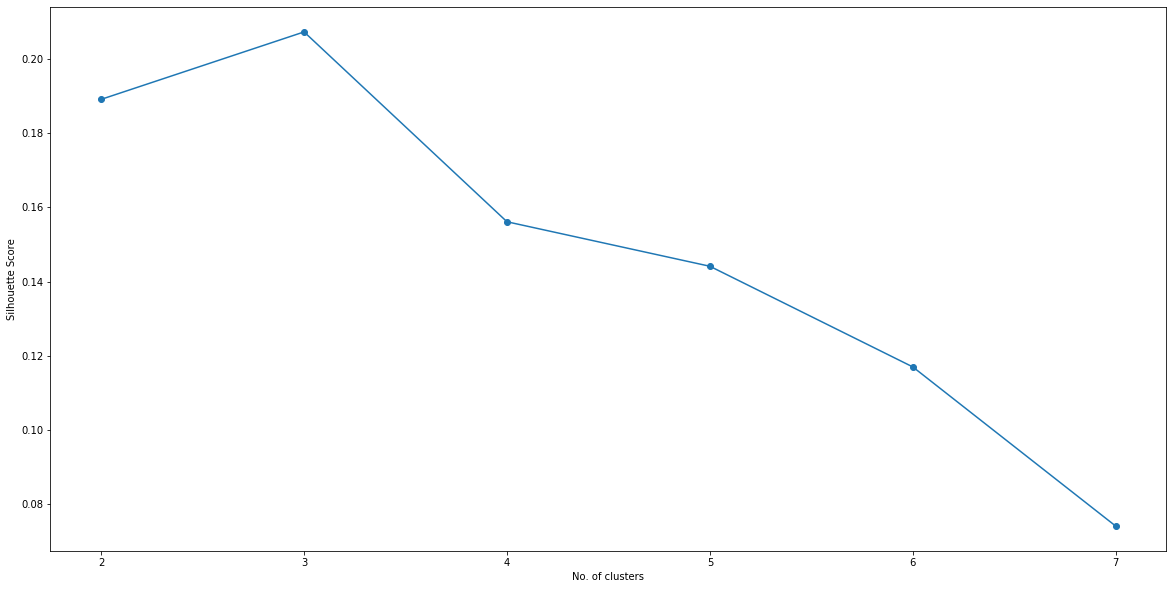

In [612]:
plot(max_range, scores, "No. of clusters", "Silhouette Score")

In [613]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(paris_grouped_clustering)

kmeans.labels_[0:10]

array([1, 1, 1, 1, 0, 0, 0, 2, 0])

In [614]:
neighbors.rename(columns={'Name':'Neighborhood'}, inplace=True)
neighbors.head()

,Address,Neighborhood,Latitude,Longitude
0,"75001, Île-de-France",1er Arrondissement Paris,48.863266,2.348263
1,"75002, Île-de-France",2ème Arrondissement Paris,48.867481,2.344056
2,"75003, Île-de-France",3ème Arrondissement Paris,48.863044,2.360137
3,"75004, Île-de-France",4ème Arrondissement Paris,48.860845,2.352929
4,"75005, Île-de-France",5ème Arrondissement Paris,48.846403,2.348368


In [615]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
paris_merged = neighbors
paris_merged = paris_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

paris_merged

,Address,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75001, Île-de-France",1er Arrondissement Paris,48.863266,2.348263,1,French Restaurant,Bakery,Coffee Shop,Cocktail Bar,Chinese Restaurant,Pizza Place,Restaurant,Ice Cream Shop,Hotel,Wine Bar
1,"75002, Île-de-France",2ème Arrondissement Paris,48.867481,2.344056,1,French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Italian Restaurant,Pedestrian Plaza,Restaurant,Bar,Bakery
2,"75003, Île-de-France",3ème Arrondissement Paris,48.863044,2.360137,1,Coffee Shop,Art Gallery,French Restaurant,Burger Joint,Restaurant,Bistro,Cocktail Bar,Clothing Store,Bookstore,Japanese Restaurant
3,"75004, Île-de-France",4ème Arrondissement Paris,48.860845,2.352929,1,French Restaurant,Ice Cream Shop,Burger Joint,Coffee Shop,Art Gallery,Bakery,Park,Wine Bar,Pub,Sandwich Place
4,"75005, Île-de-France",5ème Arrondissement Paris,48.846403,2.348368,0,French Restaurant,Bakery,Italian Restaurant,Bookstore,Plaza,Bar,Coffee Shop,Indie Movie Theater,Comic Shop,Creperie
5,"75006, Île-de-France",6ème Arrondissement Paris,48.849392,2.332260,0,French Restaurant,Hotel,Plaza,Garden,Bistro,Restaurant,Chocolate Shop,Bookstore,Ice Cream Shop,Wine Bar
6,"75007, Île-de-France",7ème Arrondissement Paris,48.854757,2.324789,0,French Restaurant,Hotel,Plaza,Italian Restaurant,Coffee Shop,Garden,Bistro,Bakery,Bookstore,Japanese Restaurant
7,"75008, Île-de-France",8ème Arrondissement Paris,48.868853,2.320879,2,Hotel,French Restaurant,Boutique,Garden,Women's Store,Dessert Shop,Plaza,Theater,Tea Room,Gourmet Shop
8,"75009, Île-de-France",9ème Arrondissement Paris,48.877070,2.337921,0,French Restaurant,Hotel,Wine Bar,Italian Restaurant,Cocktail Bar,Coffee Shop,Plaza,Pizza Place,Bar,Bistro


In [616]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Neighborhood'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [617]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[0] + list(range(5, paris_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"75005, Île-de-France",French Restaurant,Bakery,Italian Restaurant,Bookstore,Plaza,Bar,Coffee Shop,Indie Movie Theater,Comic Shop,Creperie
5,"75006, Île-de-France",French Restaurant,Hotel,Plaza,Garden,Bistro,Restaurant,Chocolate Shop,Bookstore,Ice Cream Shop,Wine Bar
6,"75007, Île-de-France",French Restaurant,Hotel,Plaza,Italian Restaurant,Coffee Shop,Garden,Bistro,Bakery,Bookstore,Japanese Restaurant
8,"75009, Île-de-France",French Restaurant,Hotel,Wine Bar,Italian Restaurant,Cocktail Bar,Coffee Shop,Plaza,Pizza Place,Bar,Bistro


In [618]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[0] + list(range(5, paris_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"75001, Île-de-France",French Restaurant,Bakery,Coffee Shop,Cocktail Bar,Chinese Restaurant,Pizza Place,Restaurant,Ice Cream Shop,Hotel,Wine Bar
1,"75002, Île-de-France",French Restaurant,Japanese Restaurant,Wine Bar,Hotel,Cocktail Bar,Italian Restaurant,Pedestrian Plaza,Restaurant,Bar,Bakery
2,"75003, Île-de-France",Coffee Shop,Art Gallery,French Restaurant,Burger Joint,Restaurant,Bistro,Cocktail Bar,Clothing Store,Bookstore,Japanese Restaurant
3,"75004, Île-de-France",French Restaurant,Ice Cream Shop,Burger Joint,Coffee Shop,Art Gallery,Bakery,Park,Wine Bar,Pub,Sandwich Place


In [619]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[0] + list(range(5, paris_merged.shape[1]))]]

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,"75008, Île-de-France",Hotel,French Restaurant,Boutique,Garden,Women's Store,Dessert Shop,Plaza,Theater,Tea Room,Gourmet Shop
